<a href="https://colab.research.google.com/github/KiarashVaziri/DeepLearning-Fall2022/blob/main/Homework1/DL2022_HW1_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Kiarash Vaziri 
2.   Student Number: 98102562


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [4]:
# You are not allowed to import other packages.
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

**NOTE** <br>
The following cell is to change the directory in a way that suits my preferences.

In [5]:
from google.colab import drive
drive.mount('/content/drive')
!pwd
%cd /content/drive/MyDrive/Colab\ Notebooks/Deep\ Learning/Hw1
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Deep Learning/Hw1
/content/drive/MyDrive/Colab Notebooks/Deep Learning/Hw1
/content/drive/MyDrive/Colab Notebooks/Deep Learning/Hw1


### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [6]:
dataset = pd.read_csv("data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test
msk = np.random.rand(len(dataset)) < 0.8
np.random.shuffle(msk)
x_train = dataset['X'][msk]
y_train = dataset['Y'][msk]

x_test = dataset['X'][~msk]
y_test = dataset['Y'][~msk]

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [7]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
X_b = X_b = np.c_[x_train, np.ones((x_train.shape[0], 1))]
m = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

In [8]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = np.sum((y_train-predicted_train_y)**2)
test_error = np.sum((y_test-predicted_test_y)**2)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 128.46633766135398
MSE test error: 36.87830340670982


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

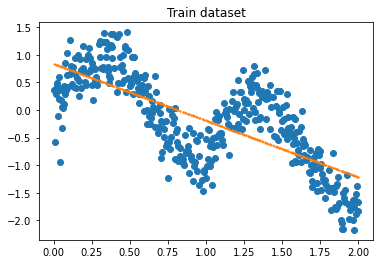

In [9]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

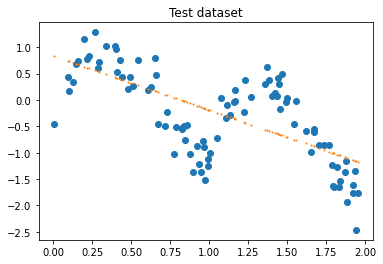

In [10]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable? 

What about the line you drew in the last part? 

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here. 

Yes, the MSE for training and test sets are quite acceptable. Since the data is intrinsically non-linear, a linear model cannot perfectly fit through data.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset? Yes

Yes because as shown in plots above, we can observe the data is locally linear.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [11]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(np.dot((xi-the_query_point), (xi-the_query_point).T)/(-2 * np.square(hyperparameter)))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [12]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((np.array(train_X).reshape((l, 1)), np.ones((l, 1))))
    qx = np.array([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    theta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ (np.array(train_Y).reshape((l, 1))))
    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [13]:
hyperparameter = 0.05
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
error = np.sum((np.array(predicted_test).reshape((-1, )) - y_test)**2)
print(f"MSE test error: {error}")

MSE test error: 8.348287799832987


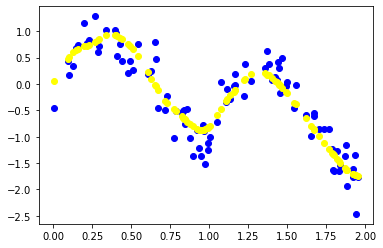

In [14]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes! The performance of the much has significantly imporoved since now we are estimating the values section by section. As shown in the figure above, we can say that we have about 4 different sections of linear regression.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

Yes, because as discussed before, data points are locally grouped together. Since the KNN model performs based on the distance of data points, it is expected to perform well.

### Part10:
Implementing the `KNN model`.

In [15]:
from scipy.stats import mode

class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.sqrt((x1-x2)**2) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        point_dist = []
        
        for xi in self.X:
            distances = self.distance(xi , x) 
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
        
        indices = np.argsort(point_dist)[:k]  
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        labels = self.Y[neareest_indices]
        lab = mode(labels) 
        predicted_y = lab.mode[0]
        return predicted_y

In [16]:
def evaluation(k, x_train, y_train, x_test, y_test):
    x_tr = np.array(x_train)
    y_tr = np.array(y_train)
    model = KNN(k, x_tr, y_tr)
    predicted_y = [model.predict(x) for x in x_test]
    error = np.sum(np.square(predicted_y - y_test))
    return error, predicted_y

In [17]:
k = 3
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 16.80460489795269


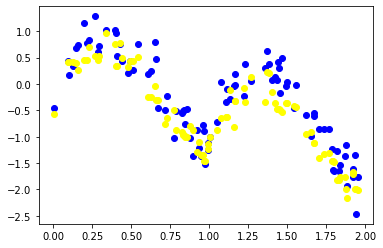

In [18]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

Yes, the performance of the model, compared to linear regression is much better. Also, the test error is quite reasonable and as observed in the plot, the predicted data points are near the true values. However, compared to locally weighted model, we have a poorer performance since the test error is almost twice as much.